# Importações

In [69]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from sympy import symbols, diff
from matplotlib import cm #colormap


%matplotlib inline 

## Visualização de gráficos 3d

### Minimizando a função 
$$f(x, y) = \frac {1} {3^{-x^2 - y ^ 2} + 1}$$

#### Minimizando
$$f(x,y) = \frac {1}{r+1}$$
Com $r$ igual a $3^{-x^2 - y ^ 2}$

In [32]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [64]:
#Gerando dados
x = np.linspace(start = -2, stop = 2, num = 200)
y = np.linspace(start = -2, stop = 2, num = 200)

x, y = np.meshgrid(x, y)


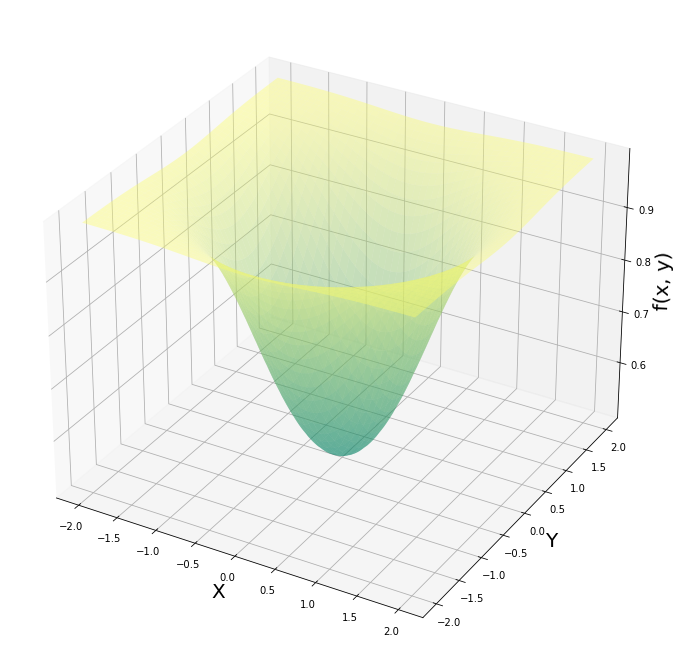

In [78]:
#Gerando grafico 3d


fig = plt.figure(figsize = [16,12])
ax = fig.gca(projection = "3d")

ax.plot_surface(x, y, f(x, y), cmap = cm.summer, alpha = 0.4)
ax.set_xlabel("X", fontsize = 20)
ax.set_ylabel("Y", fontsize = 20)
ax.set_zlabel("f(x, y)", fontsize = 20)

plt.show()

## Derivadas Parciais e Computação Simbolica

In [111]:
a, b = symbols("x, y")


print("Nossa função custo: ", f(a, b))
print("Derivada parcial de f(a, b) em relação a X: ", diff(f(a, b), a))

print("Valor de f(x, y) com x=1.8 e y=1: ", f(a,b).evalf(subs = {a:1.8, b:1}))

Nossa função custo:  1/(3**(-x**2 - y**2) + 1)
Derivada parcial de f(a, b) em relação a X:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Valor de f(x, y) com x=1.8 e y=1:  0.990604794032582


### Método do gradiente (Gradient descent) com Sympy

In [132]:
#Configuração inicial

multiplicador = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  #INICIAL



for n in range(max_iter):
    gradiente_x = diff(f(a,b), a).evalf(subs = {a:params[0], b:params[1]})
    gradiente_y = diff(f(a,b), b).evalf(subs = {a:params[0], b:params[1]})
    gradientes = np.array([gradiente_x, gradiente_y])
    
    
    params = params - multiplicador * gradientes

    
#Resultados
print("Valores no vetor gradientes: ", gradientes)
print("Menor valor de x: ", params[0])
print("Menor valor de y: ", params[1])
print("Custo: ", f(params[0], params[1]))

Valores no vetor gradientes:  [1.08410585157738e-23 6.02281028654100e-24]
Menor valor de x:  1.86518075868510e-23
Menor valor de y:  1.03621153260284e-23
Custo:  0.500000000000000
